# **E-commerce within Logistics Industry**

**Data Background**:- An international e-commerce company sells electronic product where it records their product shipment delivery to their customers. The dataset contained 10999 observations of 12 variables.

**Data Source**:- Kaggle.com

## **Problem Statement**

In the logistics industry, ensuring timely deliveries and optimizing shipment efficiency across different modes of transportation such as flight, ship & road, are critical for customer satisfaction and operational success. However, discrepancies in delivery performance and weight handling capacities across these modes may lead to inefficiencies and increased customer dissatisfaction. Addressing these challenges requires a detailed analysis of the factors affecting shipment efficiency and delivery times.

## **Objectives**


1. Analyze how different modes of shipment handle varying weights and to determine if there are opportunities to better utilize each mode based on weight handling capabilities.

2. Evaluate how real-time tracking information affects customer satisfaction and trust in e-commerce transactions.






## **Data Cleaning**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
data = pd.read_csv('/content/drive/MyDrive/DataManagement/Train.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1




The data contains the following information:

**ID:** ID Number of Customers.

**Warehouse block:** Big Warehouse which is divided in to block such as A,B,C,D,E.

**Mode of shipment:** Multiple way such as Ship, Flight and Road.

**Customer care calls:** The number of calls made from enquiry for enquiry of the shipment.

**Customer rating:** 1 is the lowest (Worst), 5 is the highest (Best).

**Cost of the product:** Currency in US Dollars.

**Prior purchases:** The Number of Prior Purchase.

**Product importance:** The company has categorized the product in the various parameter such as low, medium, high.

**Gender:** Male and Female.

**Discount offered:** Discount offered on that specific product.

**Weight in gms:** It is the weight in grams.

**Reached on time:** 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time


In [63]:
#find missing values
missing_values = data.isnull().sum()
print(missing_values)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


No missing values found hence we can proceed with further analysis

## **Data Visualisation & Insights**

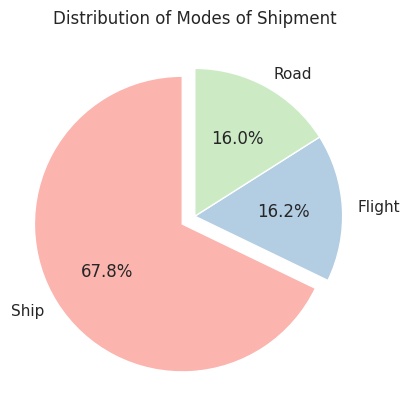

In [64]:
#create pie chart for shipment mode
fig, ax = plt.subplots()
data['Mode_of_Shipment'].value_counts().plot(kind='pie',
                                             autopct='%1.1f%%',  #shows percentages on the chart
                                             ax=ax,
                                             colors=plt.cm.Pastel1.colors,
                                             startangle=90,  #rotates the start of the pie chart
                                             explode=(0.1, 0, 0))  #pulls the first slice out for emphasis
ax.set_ylabel('')  #removes the y-axis label
ax.set_title('Distribution of Modes of Shipment')
plt.show()

Based on the pie chart, Ship is the highest mode of shipment with 67.8% compared to Flight and Road.

In [65]:
#create boxplot of weight comparison by shipment mode
fig = px.box(data, y='Weight_in_gms', x='Mode_of_Shipment', color='Mode_of_Shipment')
fig.update_layout(title='Comparison of Weights by Mode of Shipment')
fig.show()


Road shipments have the highest median weight and the greatest variability in
weights.

Ship shipments is the 2nd highest median weight but with some very heavy outliers.

Flight shipments have the lowest median weight and the least variability, indicating a more consistent shipping weight.

These insights could be crucial for logistics operational planning, especially in deciding which modes are most suitable for different types of cargo based on weight.

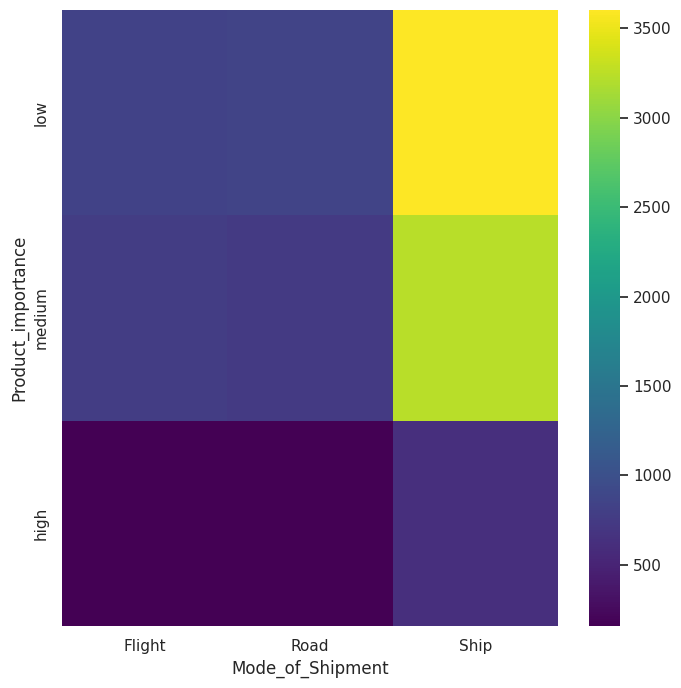

In [66]:
#plot heatmap of shipment mode and product importance
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Product_importance'].value_counts()
    for x_label, grp in data.groupby('Mode_of_Shipment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Mode_of_Shipment')
_ = plt.ylabel('Product_importance')

Acoording to the heatmap above, darker shades representing higher frequencies of shipments. For lighter shades, refer to lower frequencies.

The choice of shipment mode is highly influenced by the importance of the products. High importance products is shipped more frequently by air to ensure fast delivery, while less critical items are more often shipped by sea, where cost-efficiency is prioritized. Road shipments are utilized across all categories.

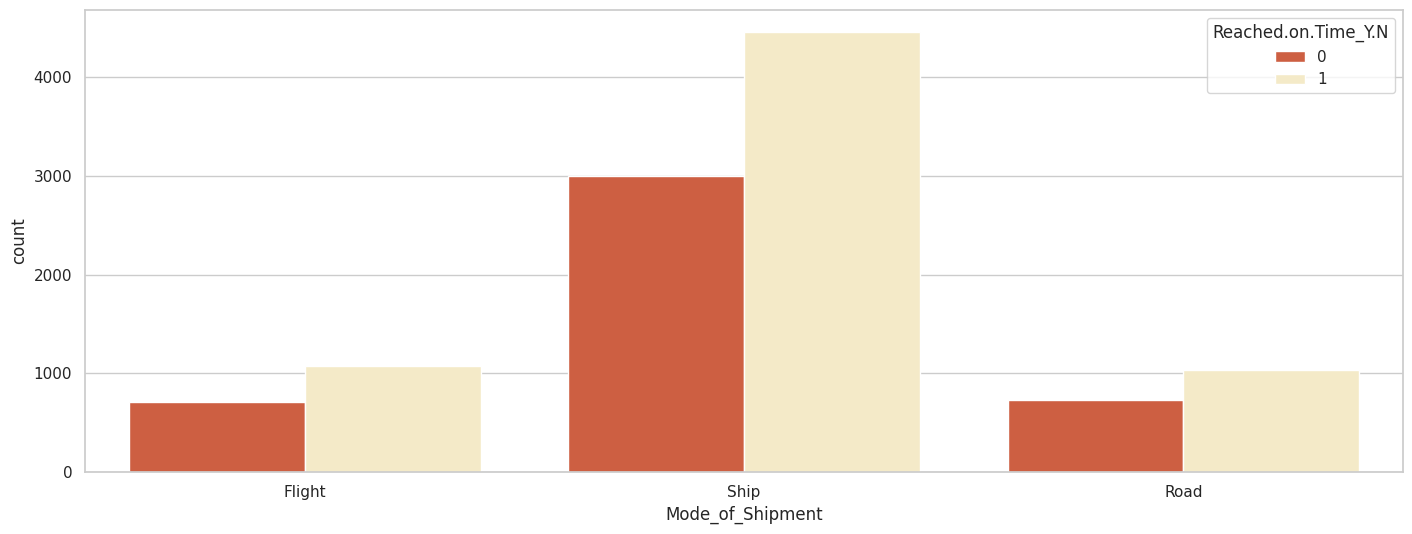

In [67]:
#use custom color palette
custom_palette = ['#E4512B', '#FBEEC1']

#plot mode of shipment column and see the effect of reached on time or not.
plt.figure(figsize = (17, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data = data, palette = custom_palette)
plt.show()

Based on the countplot, we can observe that reached on time with indicator "1" is higher across all types of mode of shipment, meaning product does not reach on time is higher compared to products that reached on time.

Road and especially flight modes of shipment appear relatively more reliable for on-time delivery compared to shipments by ship.

Given the significant delays associated with ship transport, there may be a need for logistic strategies focused on improving the reliability of this mode of shipment. This could include better route planning, improved logistical handling, faster clearance procedures, or more reliable scheduling.

This analysis should guide operational adjustments and customer communication strategies, potentially shifting more time-sensitive shipments to more reliable transport modes like air or considering different strategies for improving reliability in shipping and road transport.


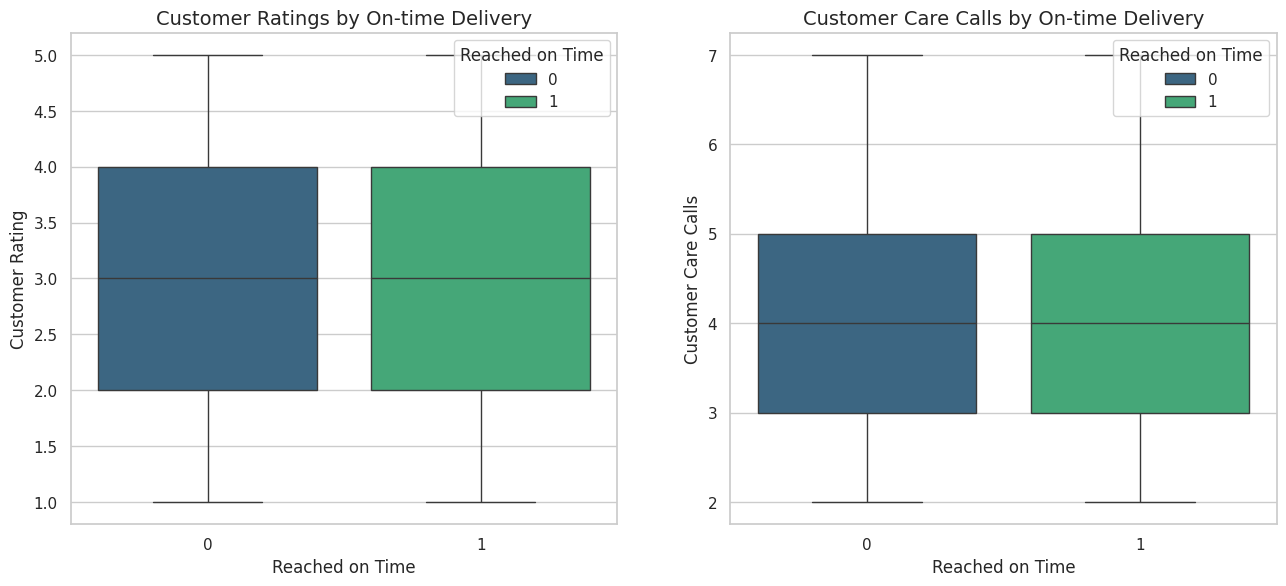

In [68]:
#set color palette and style
sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
#box plot for customer ratings and on-time delivery
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(x='Reached.on.Time_Y.N', y='Customer_rating', data=data, hue='Reached.on.Time_Y.N',
            palette='viridis')
plt.title('Customer Ratings by On-time Delivery', fontsize=14)
plt.xlabel('Reached on Time', fontsize=12)
plt.ylabel('Customer Rating', fontsize=12)
#legend top right
ax1.legend(title='Reached on Time', loc='upper right')

#box plot for customer care calls and on-time delivery
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(x='Reached.on.Time_Y.N', y='Customer_care_calls', data=data, hue='Reached.on.Time_Y.N',
            palette='viridis')
plt.title('Customer Care Calls by On-time Delivery', fontsize=14)
plt.xlabel('Reached on Time', fontsize=12)
plt.ylabel('Customer Care Calls', fontsize=12)
#legend top right
ax2.legend(title='Reached on Time', loc='upper right')

#adjust spacing to make it prettier
plt.tight_layout(pad=4.0)
plt.show()

**Customer Ratings by On-time Delivery**

Both categories (on-time and not on-time) show a similar median rating around 3. The box and the whiskers are also similar across both categories. This suggests that whether the product was delivered on time or not, did not significantly affect the customer ratings.

The similarity in ratings distribution regardless of delivery timeliness could imply that other factors may be influencing customer satisfaction more than the timeliness of delivery.

**Customer Care Calls by On-time Delivery**

The number of customer care calls also shows a similar distribution between products that were delivered on time and those that were not. Both categories display a median of approximately 4 calls, with a slightly broader interquartile range for products that were not delivered on time.

This indicates that the number of customer care calls is relatively consistent regardless of whether the delivery was on time, suggesting that the reason for calls may not be solely related to delivery issues.

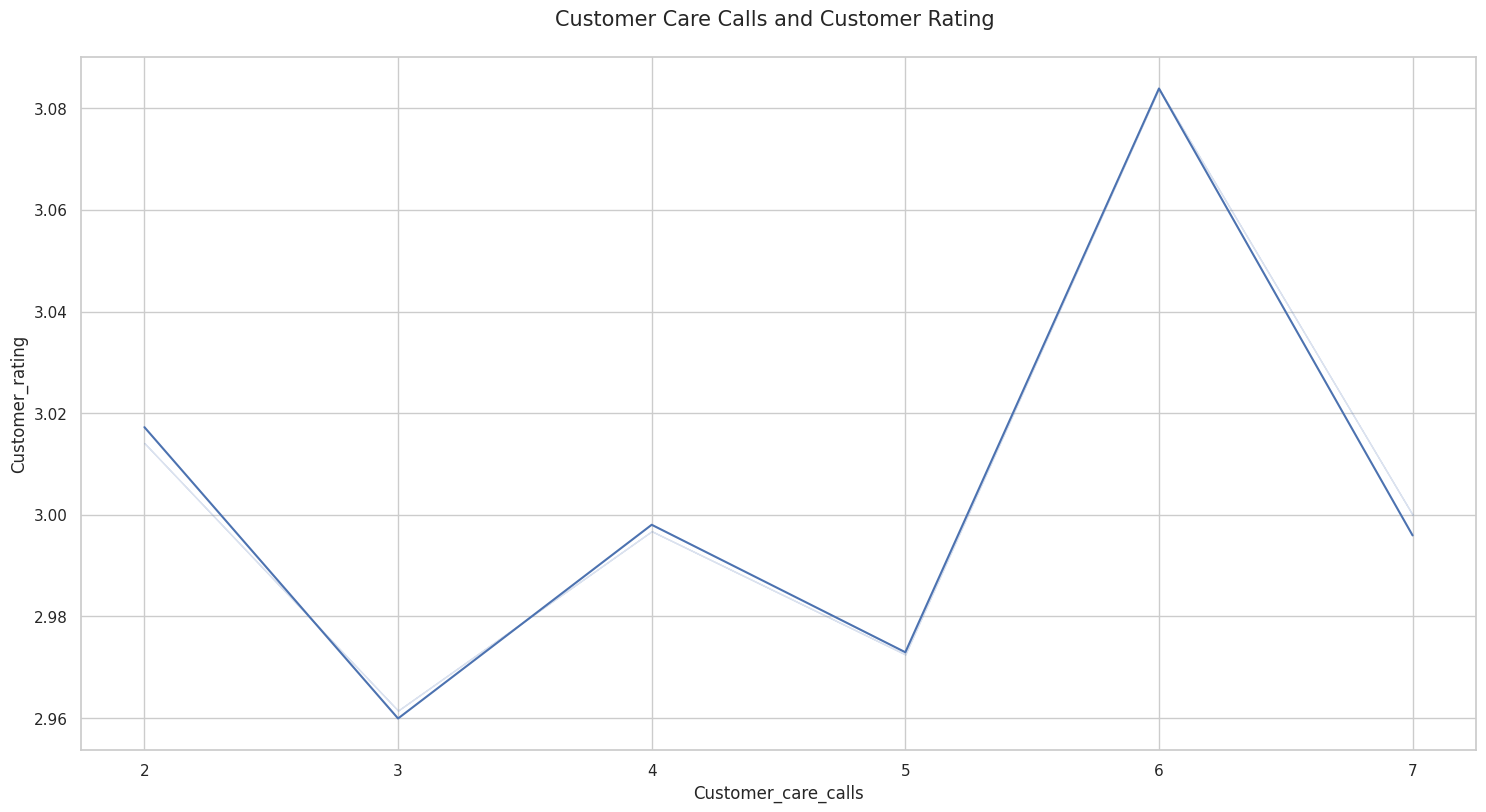

In [69]:
#create lineplot to check the relation between customer care calls, customer ratings and gender
plt.figure(figsize = (18, 9))
sns.lineplot(x = 'Customer_care_calls', y = 'Customer_rating', data = data, errorbar=('ci', 0))
plt.title('Customer Care Calls and Customer Rating \n',
          fontsize = 15)
plt.show()


This line plot shows that the relationship between how many times customers contact the customer call support and how well-satisfied they rate the product can be unpredictable.

When customer ratings increase between the 5th and 6th calls, it could be that difficult problems are being solved successfully. However, when happiness drops, especially after six calls, it often means that problems are not being fixed, leaving customers unhappy.

This insight is very important for making customer service better to fix issues quickly before they require too many follow-up calls.

In [70]:
#making boxplot between customer care calls and cost of product to see that is there any relation between them.
px.box(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data_frame = data, color = 'Customer_care_calls')

From the boxplot, we can see that there is a general trend where the number of customer care calls correlates with the variability in product cost. Products requiring more customer support which is indicated by a higher number of calls, tend to have higher median costs and greater cost variability. This could suggest that these costly products demand more attention to customer service.

## **Conclusion**

Overall analysis of the shipment data provides insightful observations that can inform strategic decisions for improving logistics and customer satisfaction. There are distinct differences in performance among the various transportation modes. Flights, while generally balanced in terms of on-time and delayed deliveries, offer the most reliable service for timely deliveries. Roads, though not as efficient as flights, still outperform ships in terms of on-time delivery. Ships have the highest rate of delays, which could be due to inherent logistical challenges associated with maritime transport.

The analysis of weights carried by different modes of shipment highlights that heavier shipments tend to be moved by road and ship, while air freight typically handles lighter packages. This distribution suggests that air freight is potentially less-utilized for heavier shipments where it might offer a more reliable delivery schedule.

The clear difference in shipment performance across different modes suggest that logistics strategies should be tailored. For critical deliveries where time is a constraint, air transport should be prioritized. For less time-sensitive, heavier shipments, optimizing cost and efficiency in road and ship transport will be crucial.

Immediate efforts should focus on improving the reliability of ship transport while leveraging the strengths of flight for urgent shipments. Long-term strategies should aim at balancing cost, efficiency, and reliability across all modes, incorporating advanced data analytics and technology enhancements like real-time tracking and automated logistics management.

Further analysis could be conducted to include factors like seasonal variations, geographical differences, and economic impacts to refine logistics strategies further. By addressing the identified issues and continuously adapting to analytics insights, the company can achieve significant gains in operational performance and customer trust.